# Exploratory Data Analysis (EDA) Template #

Ordre ideal del procés EDA:  
Inspecció inicial del conjunt de dades:  

Comprovar la grandària i les columnes del dataset.  
Revisar les primeres files per tenir una idea de la seva estructura i contingut.  


Neteja de dades (primer pas abans de qualsevol visualització):  
   - Identificació i gestió dels NaN:  
        - Comptar els valors nuls per columna i veure on es troben.  
        - Decidir si es poden imputar (amb mitjana, mediana, moda, etc.) o eliminar.  
        - Substituir els valors "unknown" o altres valors problemàtics per valors raonables o neutralitzar-los.

   - Conversió de dades categòriques:
Convertir les variables categòriques binàries a booleans (0/1), i utilitzar one-hot encoding si cal.  

Detecció i tractament dels outliers:  

Abans de fer anàlisis de correlació o regressions, és important eliminar o gestionar valors atípics que podrien afectar les correlacions.  
Pots utilitzar tècniques com l'interquartile range (IQR) o l'escalat robust per gestionar els outliers.  
Anàlisi descriptiva (una vegada les dades estan netes):  

Estadístiques resum: Mitjana, desviació estàndard, percentils, mínim, màxim, etc.  
Visualització d'histogrames: Per veure les distribucions de les variables un cop les dades estiguin netes.  
Boxplots: Per veure la distribució i identificar outliers d'una manera visual.  
Anàlisi de correlacions:  

Un cop les dades estiguin netes i sense NaNs, pots calcular correlacions amb mètodes com Pearson per a dades numèriques o Cramér’s V per a categòriques.
Visualitzar aquestes correlacions amb heatmaps per identificar relacions significatives.  

In [58]:
#1. Importació de Biblioteques #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
sns.set(style='whitegrid')
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Modelos de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

from scipy import stats

In [59]:
banc_original = pd.read_csv ('bank_dataset.csv') # carreguem el dataset
banc_original.head(5) # mostrem les primeres files

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [60]:
# Informació general del dataset
banc_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [61]:
# Descripció estadística del dataset
banc_original.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11152.0,41.235384,11.914934,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [62]:
# EDA automàtic amb Sweetviz
report = sv.analyze(banc)
report.show_html('bank_dataset.csv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bank_dataset.csv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


El conjunt de dades té 11.162 observacions i 17 columnes, amb una barreja de variables numèriques i categòriques.  
La variable objectiu és deposit, que indica si el client ha fet un dipòsit (sí/no).  

### Variables numèriques destacades: ###
L'edat mitja és de 41 anys i el 75% dels valors estan per sota els 49.
A nivell de saldo hi ha molta diversificació : amb una mitjana de 1.528, però amb un mínim de -6.847 i un màxim de 81.204, i la meitat de clients tenen per sota els 550€ de saldo positiu i un 25% està casi en saldo negatiu.
El temps en segons de la trucada, amb una mitjana de 372 segons(uns 6 minuts).    
La variable "campaign" mostra el nombre de contactes realitzats amb el client durant la campanya de màrqueting actual... Potser s'hauria de crear una variable nova per fer un càlcul del promig de temps implicat en el total de la campanya o potser la relació és millor considerar-la tal i com està (durada de la trucada i per separat, nombre de contactes realitzats).  
La variable "day" dia del mes en què es va realitzar el contacte o la interacció amb el client. Es veu clarament que baixen els dies entre el 20 i 28. Aquesta variable s'haurà de transformar doncs, no representa exactament una quantitat mesurable sinó una tendencia en el temps (relació directe en quan el banc a gestionat els ingressos de nòmina o cobrat préstecs).   
La variable "pdays" nombre de dies que han passat des de la darrera vegada que un client va ser contactat, s'haurà d'estudiar bé doncs em confonen els números negatius. Suposo que negatiu es refereix a no contacte doncs són la majoria de valors. Equivaldria a No contactat però és numèrica de moment.
La variable "previous", contactes anteriors realitzats... tindria llògica l'interpretació de la variable anterior, doncs fins el tercer quartil, son 0. 

### Variables categòriques destacades: ###
Feines: la majoria de categories representen, gerents, ma d'obra i tècnics.  
Estats civils compren 3 categories: solter, casat, divorciat. Sent lleugerament superior la quantitat de perfils casats que els no casats.
Educació: Més del 30% tenen estudis superiors i més del 50% la secundaria, sent molt baixa la tasa de perfils que només han arribat a primària. 

### Variables de Si/no (a convertir a booleanes): ###
La variable objectiu, és dipòsit, amb gairebé igual nombre de "no" (5.873) i "sí" (5.289).    
La variable "loan" es refereix a si el client té un préstec personal. És una variable categòrica amb valors "yes" o "no".  
La variable "housing" es refereix directament a la hipoteca.  
La variable "default" fa referencia a si el client ha tingut algun impagament o si es troba en morositat en algun crèdit o deute.  
En relació al contacte, hi ha masses valors desconeguts, amb la qual cosa, sabent de que es tracta de màrketing telefònic, donem per suposat que les consultes s'han realitzat per telèfon, aquesta variable no té valor i la eleminarem. 
La variable "default" es refereix a si el client ha tingut algun impagament. El 90% no han faltat a cap pagament.
En relació a "poutcome" (resultat en la campanya anterior), ens passa el mateix. Hem de valorar, veient la quantitat de dipòsits realitzats, si val més la pena no contar amb la variable, o substituir variables per la moda. Però crec que jugarem només amb:   
VARIABLE OBJECTIU:  Deposit.

### Netejo els valors Nuls ###

In [63]:
print(banc_original.isnull().sum())  # Comptar valors nuls

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64


In [64]:
# Hacer una copia del DataFrame
banc = banc_original.copy()

In [65]:
# Función para calcular el valor de Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Variables categóricas
categorical_vars = ['marital', 'education']

# Crear un diccionario para almacenar los resultados de Cramér's V
cramers_v_results = {}

# Calcular Cramér's V para cada variable categórica con respecto a 'deposit'
for var in categorical_vars:
    confusion_matrix = pd.crosstab(banc[var], banc['deposit'])
    cramers_v_value = cramers_v(confusion_matrix.values)
    cramers_v_results[var] = cramers_v_value

# Mostrar los resultados
for var, value in cramers_v_results.items():
    print(f'Cramér\'s V entre {var} y deposit: {value}')


Cramér's V entre marital y deposit: 0.09882430451340166
Cramér's V entre education y deposit: 0.10497906761994182


Las dos variables: estado civil y educación, muestran una baja relación con el target "deposit".    
Cramér's V entre marital y deposit: 0.0988      
Cramér's V entre education y deposit: 0.1049  

In [66]:
# Reemplazo NaN en 'age' con la media
banc['age'] = banc['age'].fillna(banc['age'].mean())

# Reemplazo NaN en 'marital' y 'education' con la moda
banc['marital'] = banc['marital'].fillna(banc['marital'].mode()[0])
banc['education'] = banc['education'].fillna(banc['education'].mode()[0])

# Verifico si quedan NaNs
banc.isnull().sum().sum()

0

In [67]:
# Valores únicos antes del reemplazo
print(banc['contact'].unique())
print(banc['poutcome'].unique())

['unknown' 'cellular' 'telephone']
['unknown' 'other' 'failure' 'success']


In [68]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - 1
    kcorr = k - 1
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

# Suponiendo que ya tienes tu DataFrame df_nuevo
# Calcular Cramér's V para 'contact' y 'poutcome'
cramers_v_contact = cramers_v(banc['contact'], banc['deposit'])
cramers_v_poutcome = cramers_v(banc['poutcome'], banc['deposit'])

print(f"Cramér's V entre contact y deposit: {cramers_v_contact}")
print(f"Cramér's V entre poutcome y deposit: {cramers_v_poutcome}")


Cramér's V entre contact y deposit: 0.25655472697826837
Cramér's V entre poutcome y deposit: 0.2995600177093355


relación moderada entre las variables contact y poutcome con respecto a la variable objetivo deposit,   
Cramér's V entre contact y deposit: 0.2565:  la forma en que se contactó a los clientes tiene un impacto en la probabilidad de que realicen un depósito.     
Cramér's V entre poutcome y deposit: 0.2996: el resultado de campañas previas (poutcome) tiene una influencia en la decisión de los clientes de realizar un depósito.  

In [69]:
banc['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [70]:
banc['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

Decido eliminar las columnas porque me parecen dos variables muy evidentes, porque los valores telefono, movil o no lo sé, evidentemente que se relacionan con el éxito de poder subscribir un depósito. Pero dos variables son muy iguales y "desconocido", no aporta información, si siquiera si se descarta que fuera llamada telefónica también.  
La relación la mantendremos mejor con "previous". Si hubo contacto previo.   
por otro lado los valores de la variable poutcome: éxito, fracaso, no se sabe y otros, no dan nada diferente al target, que nos indica si hubo o no éxito.

In [71]:
# Eliminar les columnes 'contact', 'poutcome' del nou df
banc.drop(columns=['contact', 'poutcome'], inplace=True)

In [72]:
# Crear la nova columna 'contact_previ' basada en 'previous'
banc['contact_previ'] = banc['previous'].apply(lambda x: 'yes' if x > 0 else 'no')

# Comprovar si la transformació ha creat només valors 1 o 0
print(banc['contact_previ'].value_counts())

# Eliminar la columna 'previous' ja que és redundant amb 'contact_previ'
banc.drop(columns=['previous'], inplace=True)

contact_previ
no     8324
yes    2838
Name: count, dtype: int64


### Converteixo les variables objecte a categòriques de moment

In [73]:
banc[['job', 'marital', 'education', 'contact_previ', 'month', 'day']] = banc[['job', 'marital', 'education', 'contact_previ','month', 'day']].astype('category')


NO Converteixo ni day ni month a ordinal per no crear error en que es cregui que 31 és més de 1 o decembre més de gener. Hi hauria una manere de veure cicles però no ho veig interessant amb les poques dades que tenim.


In [74]:
#months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
#banc['month'] = pd.Categorical(banc['month'], categories=months_order, ordered=True)

In [75]:
banc['age'] = banc['age'].astype(int)

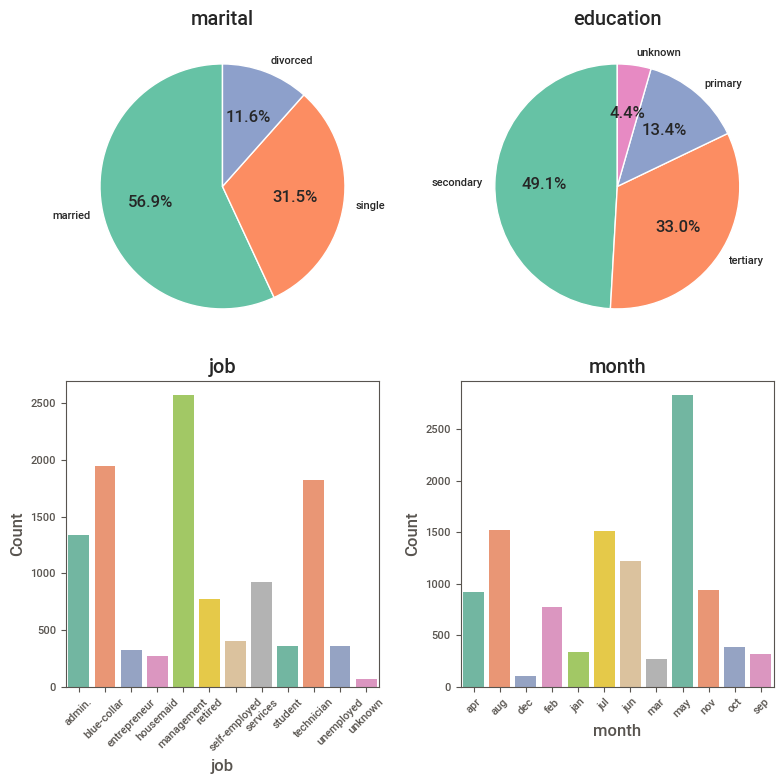

In [76]:
# Variables categóricas
categorical_vars = ['marital', 'education']
bar_vars = ['job', 'month']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Gráficos circulares para marital y education
for ax, var in zip(axes.flatten()[:2], categorical_vars):
    counts = banc[var].value_counts()
    
    # Crear el gráfico de pastel
    counts.plot.pie(
        autopct='%1.1f%%',
        ax=ax,
        startangle=90,
        colors=sns.color_palette("Set2"),
        wedgeprops=dict(edgecolor='white')
    ) 
    ax.set_title(var)
    ax.set_ylabel('')
# Gráficos de barras para job y month
for ax, var in zip(axes.flatten()[2:], bar_vars):
    counts = banc[var].value_counts()
    counts_filtered = counts[counts >= 50]  # Ajusta el umbral según tus necesidades
    
    sns.barplot(x=counts_filtered.index, y=counts_filtered.values, ax=ax, palette='Set2')
    ax.set_title(var)
    ax.set_ylabel('Count')
    ax.set_xlabel(var)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x
# Ajustar el layout
plt.tight_layout()
plt.show()


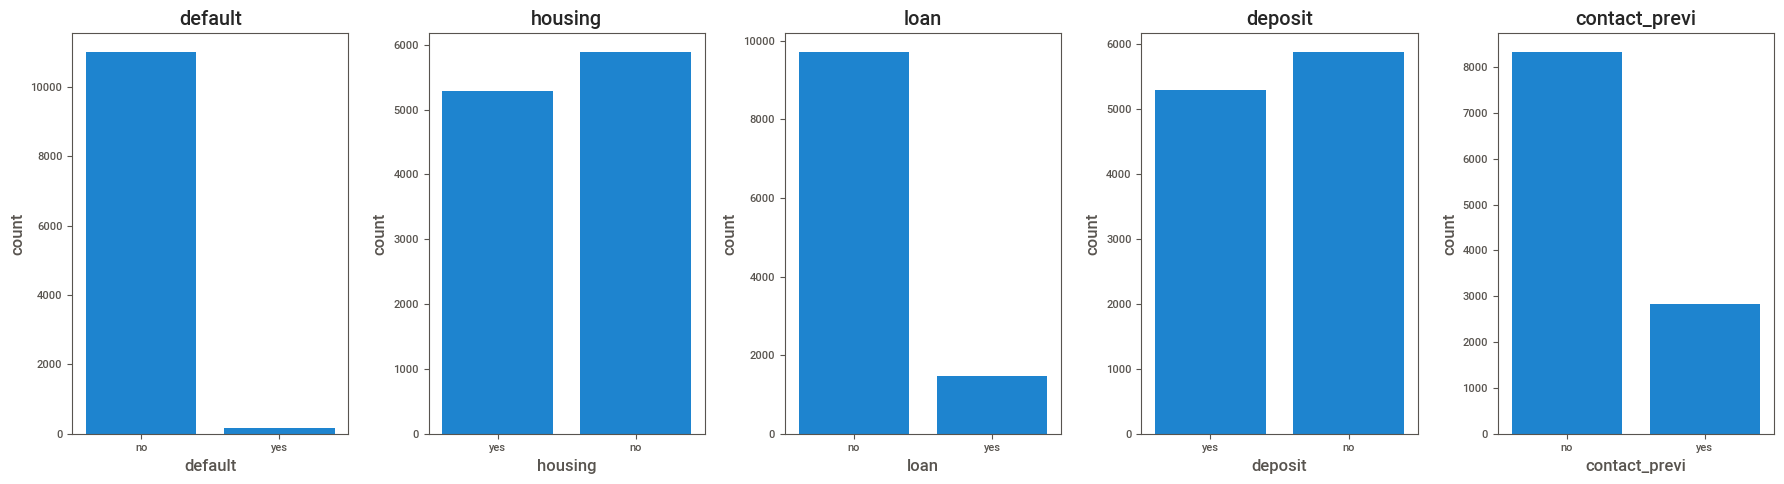

In [77]:
boolean_vars = ['default', 'housing', 'loan', 'deposit', 'contact_previ']
fig, axes = plt.subplots(1, len(boolean_vars), figsize=(18, 5))
for ax, var in zip(axes.flatten(), boolean_vars):
    sns.countplot(x=banc[var], ax=ax)
    ax.set_title(var)
plt.tight_layout()
plt.show()

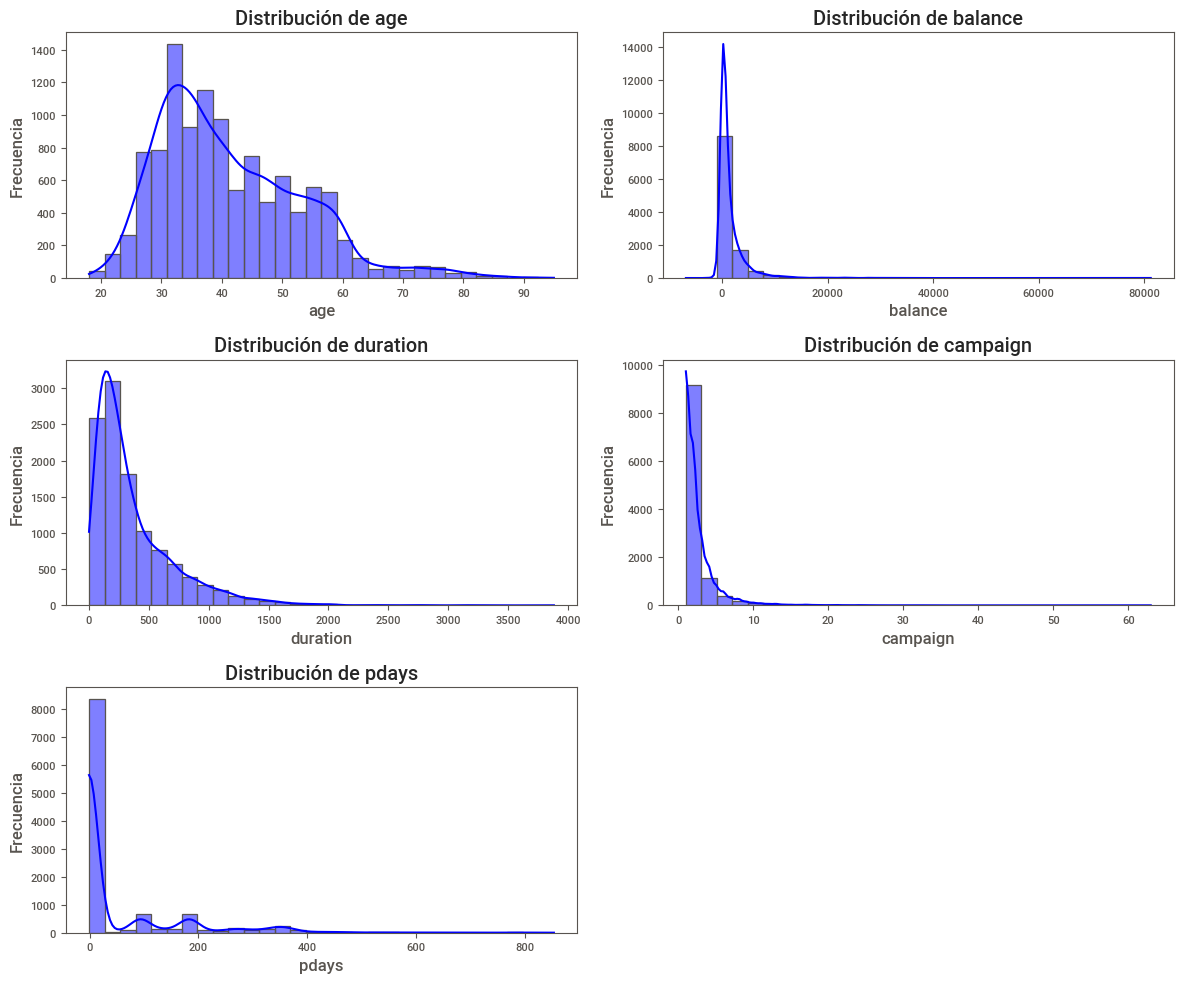

In [78]:
# Lista de columnas numéricas
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays']

# Crear histogramas
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)  # Ajustar el número de filas y columnas
    sns.histplot(banc[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Observamos que ninguna variable numérica sigue una distribución normal

In [79]:
banc.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,deposit,contact_previ
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,yes,no
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,yes,no
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,yes,no
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,yes,no
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,yes,no


In [80]:
# Contar cuántos valores son -1 en la columna 'pdays'
count_minus_one = (banc['pdays'] == -1).sum()
print(f"Número de valores -1 en 'pdays': {count_minus_one}")


Número de valores -1 en 'pdays': 8324


In [81]:
banc['pdays'].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

Última gràfica descriptiva de la variable pdays per acabar de decidir com la tractem.

In [82]:
# Filtrar los valores de pdays excluyendo -1
pdays_filtered = banc[banc['pdays'] != -1]['pdays']

# Calcular estadísticas descriptivas
pdays_stats = pdays_filtered.describe()

# Calcular media, mediana y desviación estándar
mean_pdays = pdays_filtered.mean()
median_pdays = pdays_filtered.median()
std_pdays = pdays_filtered.std()

# Imprimir resultados
print("Estadísticas descriptivas para 'pdays' (excluyendo -1):")
print(pdays_stats)
print(f"\nMedia: {mean_pdays}")
print(f"Mediana: {median_pdays}")
print(f"Desviación Estándar: {std_pdays}")


Estadísticas descriptivas para 'pdays' (excluyendo -1):
count    2838.000000
mean      204.818182
std       122.196901
min         1.000000
25%        98.000000
50%       182.000000
75%       286.000000
max       854.000000
Name: pdays, dtype: float64

Media: 204.8181818181818
Mediana: 182.0
Desviación Estándar: 122.1969007200376


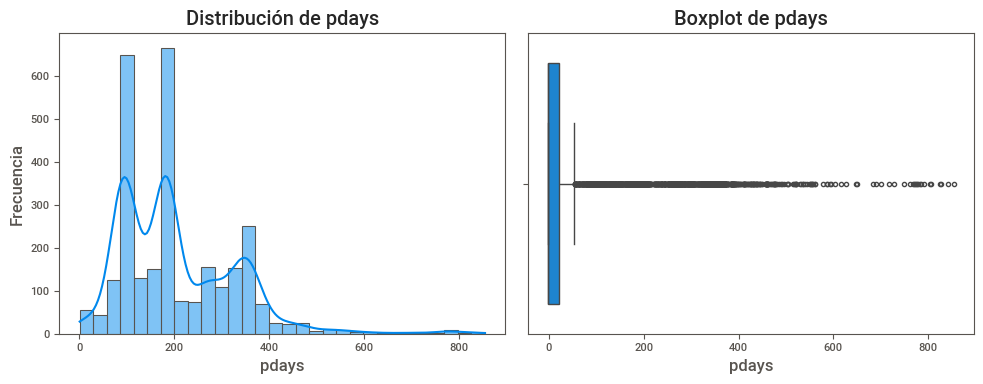

In [83]:
# Histograma
# Crear una figura con subgrillas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Un arreglo 1x2 de subgrillas

# Histograma
sns.histplot(banc[banc['pdays'] != -1]['pdays'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de pdays')
axes[0].set_xlabel('pdays')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=banc['pdays'], ax=axes[1])
axes[1].set_title('Boxplot de pdays')
axes[1].set_xlabel('pdays')

# Ajustar el espacio entre subgrillas
plt.tight_layout()
plt.show()

valoro afegir una columna categòrica on consti pdays en 5 nivells. Però conservant pdays.

In [84]:
# Definir las condiciones y las etiquetas para las categorías
bins = [-2, -1, 30, 90, 180, float('inf')]  # Ajustando el límite para separar "No contactado"
labels = ['No contactado', 'Contactado recientemente', 'Contactado hace 1-3 meses', 'Contactado hace 3-6 meses', 'Contactado hace más de 6 meses']

# Crear la nueva columna categórica 'ultimo contacto'
banc['ultimo contacto'] = pd.cut(banc['pdays'], bins=bins, labels=labels)

# Verificar la distribución de las categorías
banc['ultimo contacto'].value_counts()

ultimo contacto
No contactado                     8324
Contactado hace más de 6 meses    1559
Contactado hace 3-6 meses          950
Contactado hace 1-3 meses          273
Contactado recientemente            56
Name: count, dtype: int64

In [85]:
banc.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,deposit,contact_previ,ultimo contacto
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,yes,no,No contactado
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,yes,no,No contactado
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,yes,no,No contactado
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,yes,no,No contactado
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,yes,no,No contactado


In [86]:
banc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              11162 non-null  int32   
 1   job              11162 non-null  category
 2   marital          11162 non-null  category
 3   education        11162 non-null  category
 4   default          11162 non-null  object  
 5   balance          11162 non-null  int64   
 6   housing          11162 non-null  object  
 7   loan             11162 non-null  object  
 8   day              11162 non-null  category
 9   month            11162 non-null  category
 10  duration         11162 non-null  int64   
 11  campaign         11162 non-null  int64   
 12  pdays            11162 non-null  int64   
 13  deposit          11162 non-null  object  
 14  contact_previ    11162 non-null  category
 15  ultimo contacto  11162 non-null  category
dtypes: category(7), int32(1), int64(4), obje

In [87]:
# Mostrar valores únicos para cada columna del dataframe
for col in banc.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(banc[col].unique())
    print("\n")

Valores únicos en la columna 'age':
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]


Valores únicos en la columna 'job':
['admin.', 'technician', 'services', 'management', 'retired', ..., 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']


Valores únicos en la columna 'marital':
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


Valores únicos en la columna 'education':
['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


Valores únicos en la columna 'default':
['no' 'yes']


Valores únicos en la columna 'balance':
[2343   45 1270 .

In [88]:
# Convertir las columnas de respuesta booleana a numéricas
banc['default_numeric'] = banc['default'].map({'yes': 1, 'no': 0})
banc['housing_numeric'] = banc['housing'].map({'yes': 1, 'no': 0})
banc['loan_numeric'] = banc['loan'].map({'yes': 1, 'no': 0})
banc['contact_previ_numeric'] = banc['contact_previ'].map({'yes': 1, 'no': 0})

# Convertir la columna 'deposit' a numérica
banc['deposit_numeric'] = banc['deposit'].map({'yes': 1, 'no': 0})

# Comprobar los datos convertidos
print("Datos convertidos:")
banc[['default_numeric', 'housing_numeric', 'loan_numeric', 'contact_previ_numeric', 'deposit_numeric']].head()

Datos convertidos:


,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric,deposit_numeric
0,0,1,0,0,1
1,0,0,0,0,1
2,0,1,0,0,1
3,0,1,0,0,1
4,0,0,0,0,1


por el momento hemos hecho la conversión en columnas nuevas para conservar las anteriores con el mismo formato. Sobretodo por la variable DEPOSIT. 

In [89]:
banc.head()

,age,job,marital,education,default,balance,housing,loan,day,month,...,campaign,pdays,deposit,contact_previ,ultimo contacto,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric,deposit_numeric
0,59,admin.,married,secondary,no,2343,yes,no,5,may,...,1,-1,yes,no,No contactado,0,1,0,0,1
1,56,admin.,married,secondary,no,45,no,no,5,may,...,1,-1,yes,no,No contactado,0,0,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,...,1,-1,yes,no,No contactado,0,1,0,0,1
3,55,services,married,secondary,no,2476,yes,no,5,may,...,1,-1,yes,no,No contactado,0,1,0,0,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,...,2,-1,yes,no,No contactado,0,0,0,0,1


In [90]:
# He visto que contact_previ_numeric, aunque se muestro con 0/1, no se había convertido bien a int. así que aplico el siguiente código: 
banc['contact_previ_numeric'] = pd.to_numeric(banc['contact_previ_numeric'], errors='coerce')

In [91]:
banc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    11162 non-null  int32   
 1   job                    11162 non-null  category
 2   marital                11162 non-null  category
 3   education              11162 non-null  category
 4   default                11162 non-null  object  
 5   balance                11162 non-null  int64   
 6   housing                11162 non-null  object  
 7   loan                   11162 non-null  object  
 8   day                    11162 non-null  category
 9   month                  11162 non-null  category
 10  duration               11162 non-null  int64   
 11  campaign               11162 non-null  int64   
 12  pdays                  11162 non-null  int64   
 13  deposit                11162 non-null  object  
 14  contact_previ          11162 non-null 

Compruebo que el error está corregido.

Matriz de Correlación:
                            age   balance  duration  campaign     pdays  \
age                    1.000000  0.112207  0.000142 -0.005355  0.002594   
balance                0.112207  1.000000  0.022436 -0.013894  0.017411   
duration               0.000142  0.022436  1.000000 -0.041557 -0.027392   
campaign              -0.005355 -0.013894 -0.041557  1.000000 -0.102726   
pdays                  0.002594  0.017411 -0.027392 -0.102726  1.000000   
default_numeric       -0.011462 -0.060954 -0.009760  0.030975 -0.036282   
housing_numeric       -0.168664 -0.077092  0.035051  0.006660  0.064497   
loan_numeric          -0.031533 -0.084589 -0.001914  0.034722 -0.030416   
contact_previ_numeric  0.026909  0.046107 -0.043735 -0.131363  0.824083   
deposit_numeric        0.034655  0.081129  0.451919 -0.128081  0.151593   

                       default_numeric  housing_numeric  loan_numeric  \
age                          -0.011462        -0.168664     -0.031533   
balan

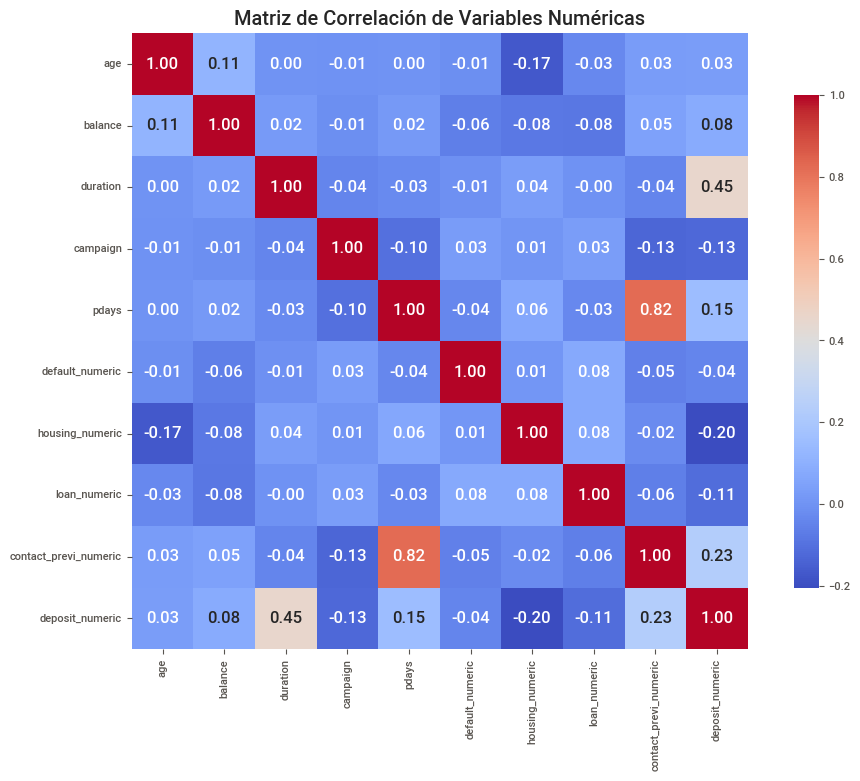

In [92]:
# Extraer columnas numéricas
numerical_cols = banc.select_dtypes(include=['int64', 'int32']).columns.tolist()

# Calcular la matriz de correlación
correlation_matrix = banc[numerical_cols].corr()

# Mostrar la matriz de correlación en cifras
print("Matriz de Correlación:")
print(correlation_matrix)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configurar el título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el gráfico
plt.show()

Anàlisi de la Matriu de Correlació excloent pdays doncs de moment la tracto com a categòrica.

pdays i contacte previ (0.82)
Correlació positiva alta doncs si s'ha contactat abans evidentment constarà en ambdues variables. 

duration i depòsit (0.45):

Hi ha una correlació positiva moderada entre la durada de la trucada i la probabilitat que un client realitzi un dipòsit. Això suggereix que a mesura que augmenta la durada de la trucada, també tendeix a augmentar la probabilitat que el client faci un dipòsit.

housing i depòsit (-0.20):
S'observa una correlació negativa dèbil, que indica que aquells que tenen un préstec hipotecari són lleugerament menys propensos a fer un dipòsit. Això podria suggerir que les persones amb hipoteques tenen menys capacitat o motivació per realitzar dipòsits.

contact_previ i dipòsit(0.2309):  
Els clients que han estat contactats més vegades en el passat tenen més probabilitats de subscriure un dipòsit, cosa que podria estar relacionada amb una major familiaritat amb el producte o la marca.

campaign i deposit (-0.13):
Hi ha una correlació negativa molt dèbil entre el nombre de contactes realitzats en la campanya i la probabilitat de fer un dipòsit. Això podria implicar que a mesura que augmenten els contactes en la campanya, els clients se senten menys propensos a fer un dipòsit, possiblement per una saturació en la comunicació.

default i deposit (-0.04):
La correlació negativa molt dèbil suggereix que les persones que estan en mora són lleugerament menys propenses a fer un dipòsit. No obstant això, la debilitat d'aquesta correlació indica que no és un factor significatiu.

balance i deposit (0.08):
La correlació positiva molt dèbil suggereix que a major saldo en el compte, també hi ha una lleugera tendència a realitzar dipòsits. No obstant això, és una relació força tènue.

day i deposit (-0.06):
La correlació negativa molt dèbil suggereix que a mesura que avança el mes (dies més alts), la probabilitat de fer un dipòsit disminueix lleugerament.

Observacions Generals
Les correlacions més fortes es troben amb la variable duration, que ressalta la importància de les interaccions més llargues amb els clients en termes de resultats positius (dipòsits).

En general, la majoria de les correlacions són força baixes, cosa que indica que moltes d'aquestes variables no estan fortament relacionades entre si en el context dels dipòsits.

Farem gràfic de dispersió per comparar les variables numèriques.

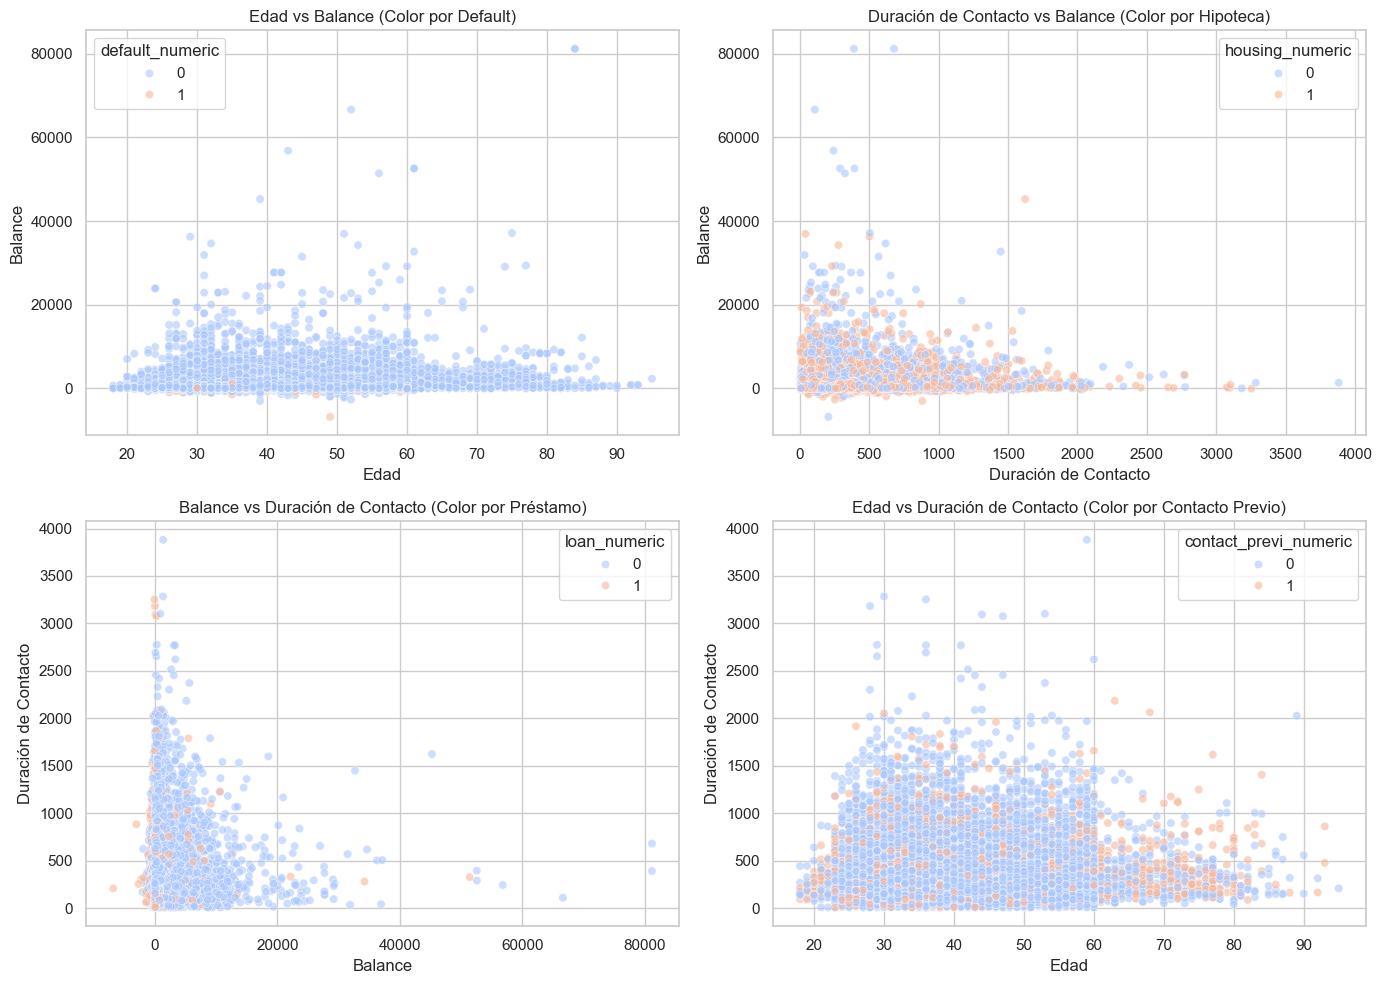

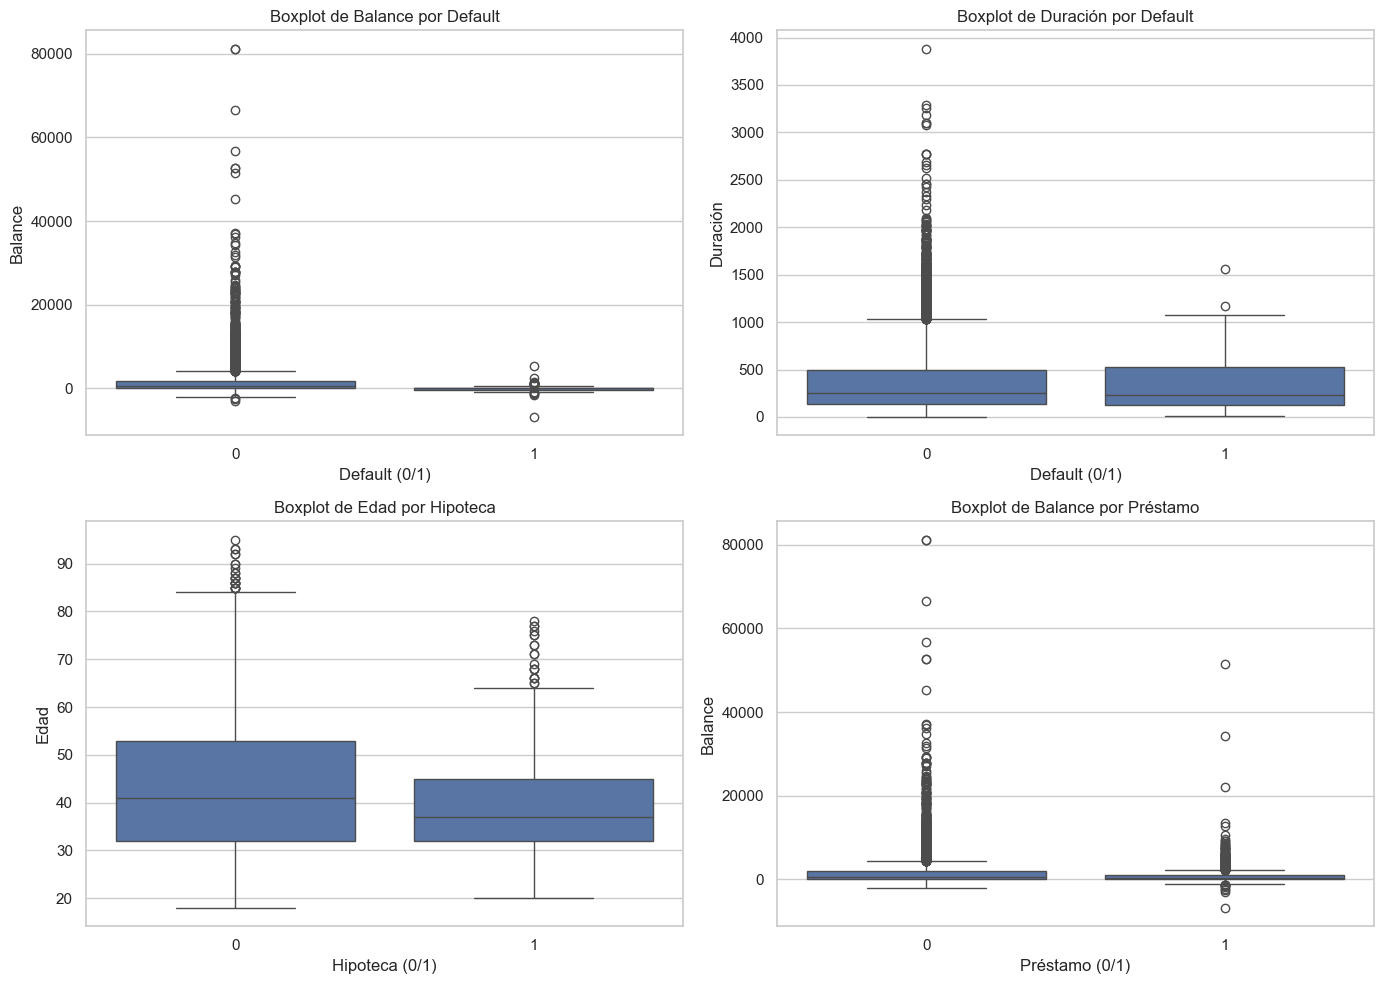

In [93]:
# Configuración de estilo
sns.set(style="whitegrid")

# Gráficos de Dispersión
plt.figure(figsize=(14, 10))

# Gráfico de dispersión: edad vs balance
plt.subplot(2, 2, 1)
sns.scatterplot(data=banc, x='age', y='balance', hue='default_numeric', palette='coolwarm', alpha=0.6)
plt.title('Edad vs Balance (Color por Default)')
plt.xlabel('Edad')
plt.ylabel('Balance')

# Gráfico de dispersión: duración vs balance
plt.subplot(2, 2, 2)
sns.scatterplot(data=banc, x='duration', y='balance', hue='housing_numeric', palette='coolwarm', alpha=0.6)
plt.title('Duración de Contacto vs Balance (Color por Hipoteca)')
plt.xlabel('Duración de Contacto')
plt.ylabel('Balance')

# Gráfico de dispersión: balance vs duración
plt.subplot(2, 2, 3)
sns.scatterplot(data=banc, x='balance', y='duration', hue='loan_numeric', palette='coolwarm', alpha=0.6)
plt.title('Balance vs Duración de Contacto (Color por Préstamo)')
plt.xlabel('Balance')
plt.ylabel('Duración de Contacto')

# Gráfico de dispersión: edad vs duración
plt.subplot(2, 2, 4)
sns.scatterplot(data=banc, x='age', y='duration', hue='contact_previ_numeric', palette='coolwarm', alpha=0.6)
plt.title('Edad vs Duración de Contacto (Color por Contacto Previo)')
plt.xlabel('Edad')
plt.ylabel('Duración de Contacto')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 10))

# Boxplot: Balance por Default
plt.subplot(2, 2, 1)
sns.boxplot(x='default_numeric', y='balance', data=banc)
plt.title('Boxplot de Balance por Default')
plt.xlabel('Default (0/1)')
plt.ylabel('Balance')

# Boxplot: Duración por Default
plt.subplot(2, 2, 2)
sns.boxplot(x='default_numeric', y='duration', data=banc)
plt.title('Boxplot de Duración por Default')
plt.xlabel('Default (0/1)')
plt.ylabel('Duración')

# Boxplot: Edad por Hipoteca
plt.subplot(2, 2, 3)
sns.boxplot(x='housing_numeric', y='age', data=banc)
plt.title('Boxplot de Edad por Hipoteca')
plt.xlabel('Hipoteca (0/1)')
plt.ylabel('Edad')

# Boxplot: Balance por Préstamo
plt.subplot(2, 2, 4)
sns.boxplot(x='loan_numeric', y='balance', data=banc)
plt.title('Boxplot de Balance por Préstamo')
plt.xlabel('Préstamo (0/1)')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()


totes les variables numèriques tenen outliers a excepció de day y month.

In [94]:
df=banc.copy()

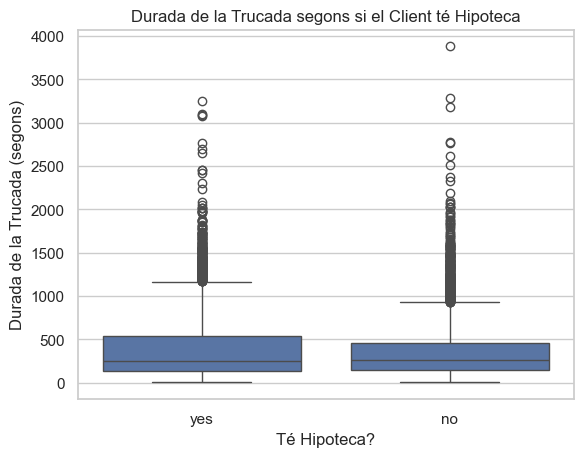

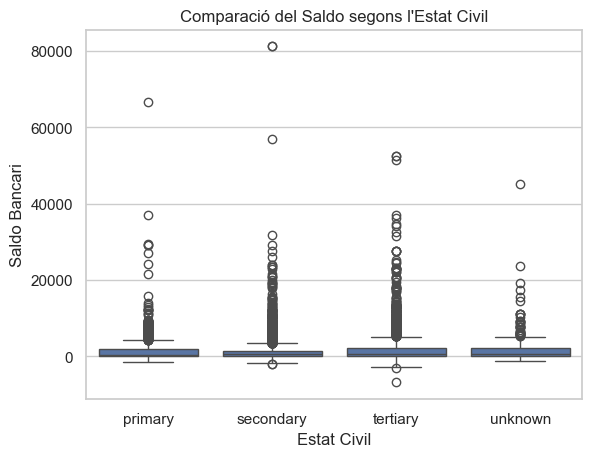

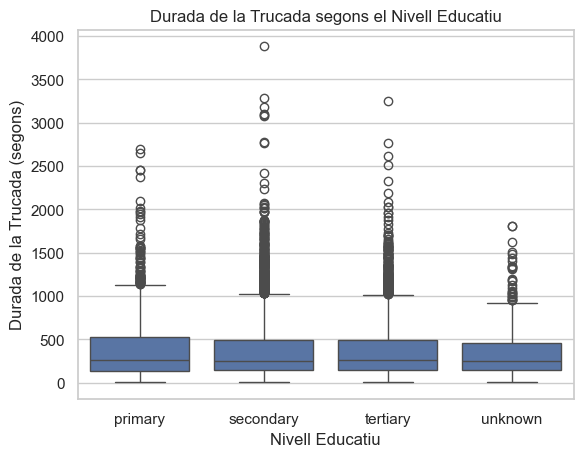

In [95]:
sns.boxplot(data=banc, x='housing', y='duration')
plt.title('Durada de la Trucada segons si el Client té Hipoteca')
plt.xlabel('Té Hipoteca?')
plt.ylabel('Durada de la Trucada (segons)')
plt.show()

sns.boxplot(data=banc, x='education', y='balance')
plt.title('Comparació del Saldo segons l\'Estat Civil')
plt.xlabel('Estat Civil')
plt.ylabel('Saldo Bancari')
plt.show()

sns.boxplot(data=banc, x='education', y='duration')
plt.title('Durada de la Trucada segons el Nivell Educatiu')
plt.xlabel('Nivell Educatiu')
plt.ylabel('Durada de la Trucada (segons)')
plt.show()


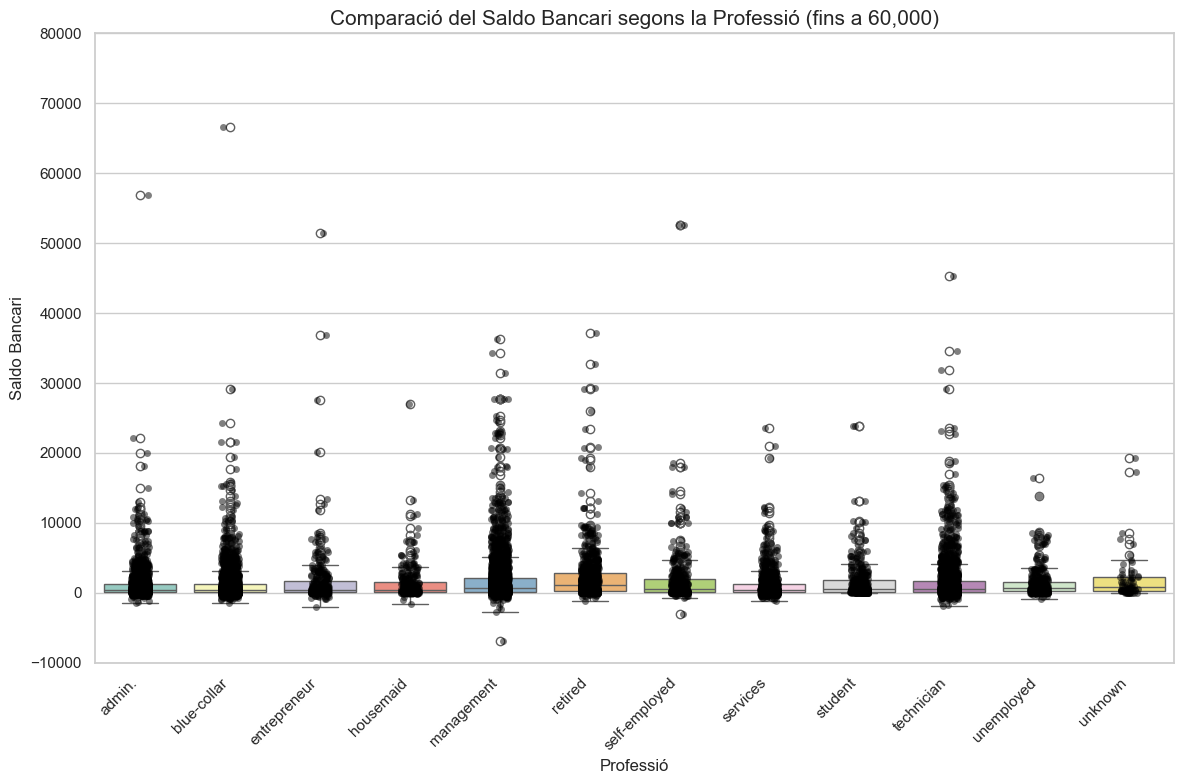

In [96]:
plt.figure(figsize=(12, 8))

# Crear el boxplot per la comparació entre professió i saldo bancari
sns.boxplot(x='job', y='balance', data=banc, palette='Set3')

# Superposar els punts individuals amb un stripplot
sns.stripplot(x='job', y='balance', data=banc, color='black', alpha=0.5, jitter=True)

# Configurar el títol i etiquetes
plt.title('Comparació del Saldo Bancari segons la Professió (fins a 60,000)', fontsize=15)
plt.xlabel('Professió', fontsize=12)
plt.ylabel('Saldo Bancari', fontsize=12)

# Establir els límits de l'eix y per ampliar fins a 40,000 i incloure els negatius
plt.ylim(-10000, 80000)

# Rotar les etiquetes de les professions per evitar que es solapin
plt.xticks(rotation=45, ha='right')

# Mostrar el gràfic amb l'ajust
plt.tight_layout()
plt.show()


Com ja hem anat veient, a exepció de Day, totes les variables numèriques mostren outliers, a més amb valors molt extrems.

<Figure size 1200x800 with 0 Axes>

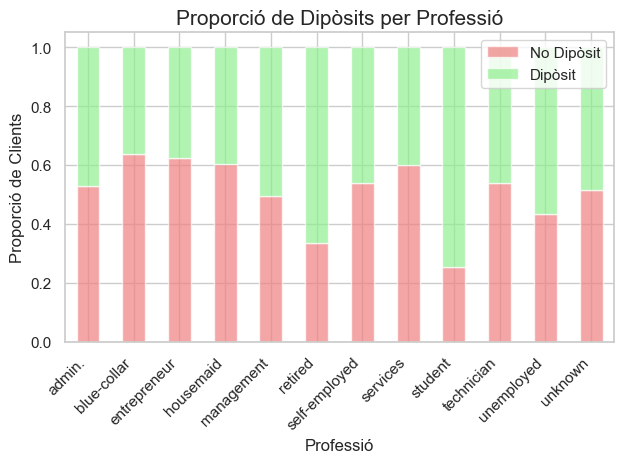

In [97]:
# Crear una taula de contingència entre 'job' i 'deposit_numeric'
job_deposit_counts = banc.groupby(['job', 'deposit_numeric']).size().unstack()

# Calcular les proporcions per cada professió
job_deposit_proportions = job_deposit_counts.div(job_deposit_counts.sum(axis=1), axis=0)

# Configurar el tamany de la figura
plt.figure(figsize=(12, 8))

# Crear el gràfic de barres apilat
job_deposit_proportions.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], alpha=0.7)

# Configurar el títol i etiquetes
plt.title('Proporció de Dipòsits per Professió', fontsize=15)
plt.xlabel('Professió', fontsize=12)
plt.ylabel('Proporció de Clients', fontsize=12)

# Rotar les etiquetes de les professions per evitar que es solapin
plt.xticks(rotation=45, ha='right')

# Llegenda
plt.legend(['No Dipòsit', 'Dipòsit'], loc='upper right')

# Mostrar el gràfic
plt.tight_layout()
plt.show()


Bàsicament els estudiants i retirats són els que tenen més possibilitat de dipòsits.

## Relació entre Variables Numèriques i categòriques (Variança) ##

In [98]:
from scipy.stats import f_oneway
# Dividir les dades segons els nivells educatius
primaria = banc[banc['education'] == 'primary']['balance']
secundaria = banc[banc['education'] == 'secondary']['balance']
terciaria = banc[banc['education'] == 'tertiary']['balance']

# Fer l'ANOVA
f_stat, p_value = f_oneway(primaria, secundaria, terciaria)

# Hipótesis
print("Hipótesis:")
print("H0: No hay diferencias significativas en el balance entre los grupos educativos.")
print("H1: Al menos una media de balance es diferente entre los grupos educativos.")

# Resultados de ANOVA
print(f"\nEstadístic ANOVA: {f_stat:.4f}")
print(f"P-valor: {p_value:.4e}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0). Hay diferencias significativas en el balance entre los grupos educativos.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay diferencias significativas en el balance entre los grupos educativos.")

Hipótesis:
H0: No hay diferencias significativas en el balance entre los grupos educativos.
H1: Al menos una media de balance es diferente entre los grupos educativos.

Estadístic ANOVA: 32.4780
P-valor: 8.6654e-15
Rechazamos la hipótesis nula (H0). Hay diferencias significativas en el balance entre los grupos educativos.


El resultat del test "ANOVA" per saber si el saldo en funció del nivell educatiu eren diferents, ha resultat ser positiu, hi ha una diferència estadísticament significativa entre almenys dos dels grups. 

La tasa de subscripció de dipòsits varia entre les persones amb diferent nivell educatius. 

 ## Relació entre variables Categòriques o Categòriques i Booleanas ##

In [99]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para 'education' y 'deposit'
contingencia = pd.crosstab(banc['education'], banc['deposit'])

# Realizar el test Chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingencia)

# Hipótesis
print("Hipótesis:")
print("H0: No hay asociación entre 'education' y 'deposit'.")
print("H1: Hay una asociación entre 'education' y 'deposit'.")

# Resultados del test Chi-cuadrado
print(f"\nChi-cuadrado: {chi2_stat:.4f}")
print(f"P-valor: {p_val:.4e}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_val < alpha:
    print("Rechazamos la hipótesis nula (H0). Hay una asociación significativa entre 'education' y 'deposit'.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay asociación significativa entre 'education' y 'deposit'.")

Hipótesis:
H0: No hay asociación entre 'education' y 'deposit'.
H1: Hay una asociación entre 'education' y 'deposit'.

Chi-cuadrado: 122.9832
P-valor: 1.7575e-26
Rechazamos la hipótesis nula (H0). Hay una asociación significativa entre 'education' y 'deposit'.


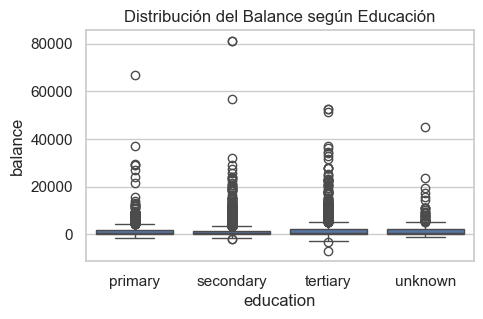

In [100]:
# Boxplot de balance por educación
plt.figure(figsize=(5, 3))
sns.boxplot(x='education', y='balance', data=banc)
plt.title('Distribución del Balance según Educación')
plt.show()

In [101]:
# Crear una tabla de contingencia entre estado civil (marital) y la suscripción de depósito (deposit)
contingencia_marital = pd.crosstab(banc['marital'], banc['deposit'])

# Aplicar el test de Chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingencia_marital)

# Hipótesis
print("Hipótesis:")
print("H0: No hay asociación entre 'marital' y 'deposit'.")
print("H1: Hay una asociación entre 'marital' y 'deposit'.")

# Resultados del test Chi-cuadrado
print(f"\nChi-cuadrado: {chi2_stat:.4f}")
print(f"P-valor: {p_val:.4e}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_val < alpha:
    print("Rechazamos la hipótesis nula (H0). Hay una asociación significativa entre 'marital' y 'deposit'.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay asociación significativa entre 'marital' y 'deposit'.")

Hipótesis:
H0: No hay asociación entre 'marital' y 'deposit'.
H1: Hay una asociación entre 'marital' y 'deposit'.

Chi-cuadrado: 108.7273
P-valor: 2.4556e-24
Rechazamos la hipótesis nula (H0). Hay una asociación significativa entre 'marital' y 'deposit'.


In [102]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(banc['marital'], banc['deposit'])
print(contingency_table)


deposit     no   yes
marital             
divorced   671   620
married   3596  2758
single    1606  1911


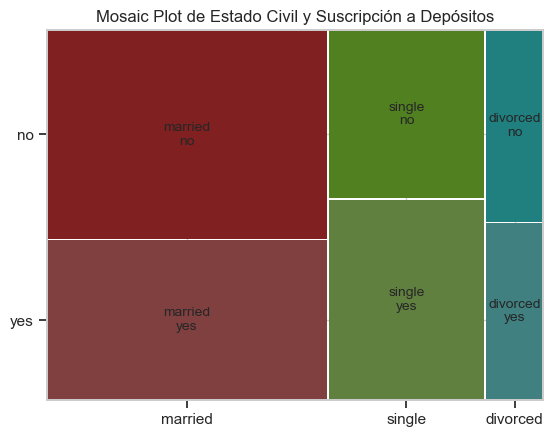

In [103]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot para marital y deposit
mosaic(banc, ['marital', 'deposit'])
plt.title('Mosaic Plot de Estado Civil y Suscripción a Depósitos')
plt.show()


Les persones solteres tenen més tendència a subscriure dipòsits (54%) en compparació amb les casades (43%) i separades (48%). 

In [104]:
# Identificar columnas categóricas y numéricas
categorical_cols = banc.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = banc.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

In [105]:
from scipy.stats import f_oneway

# Resultados de ANOVA
anova_results = {}

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        # Crear grupos según la columna categórica
        groups = [banc[banc[cat_col] == category][num_col].dropna() for category in banc[cat_col].unique()]
        
        # Realizar ANOVA si hay más de un grupo
        if len(groups) > 1:
            f_stat, p_value = f_oneway(*groups)
            anova_results[(cat_col, num_col)] = (f_stat, p_value)

anova_results

{('job', 'age'): (590.918325581558, 0.0),
 ('job', 'balance'): (12.53427958943006, 6.3679008516763485e-24),
 ('job', 'duration'): (3.523764144522808, 5.9336767863703044e-05),
 ('job', 'campaign'): (3.823532072187429, 1.621869623164113e-05),
 ('job', 'pdays'): (5.5559551016413975, 6.111852415025388e-09),
 ('job', 'default_numeric'): (2.8192462179766955, 0.0011091577404838768),
 ('job', 'housing_numeric'): (108.07372211167505, 1.9031076218221124e-235),
 ('job', 'loan_numeric'): (19.79206580386341, 4.057160188005415e-40),
 ('job', 'contact_previ_numeric'): (13.577168594122934, 3.137361662594088e-26),
 ('job', 'deposit_numeric'): (35.53723126136286, 1.269730892900322e-75),
 ('marital', 'age'): (1609.6204224272717, 0.0),
 ('marital', 'balance'): (3.9709458060988836, 0.018882241353221293),
 ('marital', 'duration'): (7.514817882011962, 0.0005477115877663407),
 ('marital', 'campaign'): (13.819114775470165, 1.0135722106e-06),
 ('marital', 'pdays'): (5.84308164561942, 0.002908772167440801),
 ('m

### Análisis de las Relaciones con depósito ###
Más Altas (Valores Más Significativos):  

(deposit, contact_previ_numeric):
Estadístico: 628.21
P-valor: 
6.32
×
1
0
−
135
6.32×10 
−135
 
Interpretación: La variable contact_previ_numeric tiene una relación extremadamente fuerte con deposit_numeric.   
Esto indica que el número de contactos previos está muy asociado con la probabilidad de que un cliente realice un depósito.

(deposit, housing_numeric):
Estadístico: 484.05
P-valor: 
4.72
×
1
0
−
105
4.72×10 
−105
 
Interpretación: Existe una fuerte asociación entre tener un préstamo de vivienda y la decisión de suscribir a un depósito.

(deposit, loan_numeric):

Estadístico: 138.15
P-valor: 
1.04
×
1
0
−
31
1.04×10 
−31
 
Interpretación: También hay una asociación significativa entre tener un préstamo y la suscripción a depósitos.

(deposit, duration):

Estadístico: 2864.17
P-valor: 
0.0
0.0
Interpretación: La duración de la llamada es ### extremadamente significativa ###, lo que indica que cuanto más tiempo se pase en la conversación, más probable es que el cliente se suscriba a un depósito.

(deposit, age):

Estadístico: 13.42
P-valor: 
0.00025
0.00025
Interpretación: Hay una relación positiva entre la edad del cliente y la probabilidad de realizar un depósito, aunque es menos fuerte que las anteriores.


Relaciones Más Bajas:

(deposit, default_numeric):

Estadístico: 18.50
P-valor: 
1.71
×
1
0
−
5
1.71×10 
−5
 
Interpretación: La relación es significativa, pero no tan fuerte como las anteriores. Esto sugiere que el estado civil tiene alguna influencia en la decisión de depositar.
(deposit, housing):

Estadístico: 484.05
P-valor: 
4.72
×
1
0
−
105
4.72×10 
−105
 
Interpretación: La relación con housing también es muy significativa, aunque se puede observar que tener o no un préstamo de vivienda tiene un impacto muy fuerte.

<Figure size 1500x900 with 0 Axes>

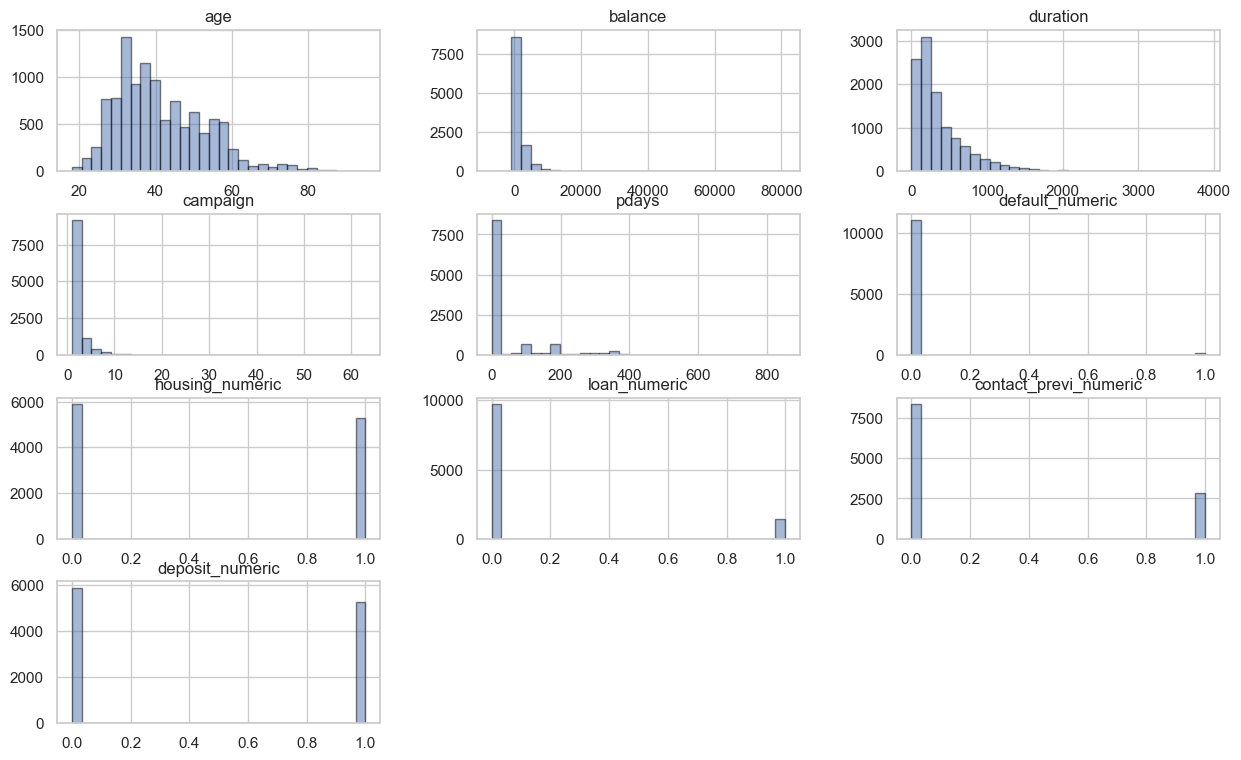

In [106]:
# Histograma de cada variable numèrica
plt.figure(figsize=(15, 9))
banc.hist(bins=30, figsize=(15, 9), alpha=0.5, edgecolor='black')  # Histograma
plt.title('Histogramas de Variables Numéricas')

# Añadir la curva de densidad
for column in banc.select_dtypes(include=['int64', 'float64']).columns:
    sns.kdeplot(banc[column], color='blue', linewidth=2)

plt.show()

Totes les variables estan desbalancejades. En el cas de dies, són valors rectes perquè són tractats com una categòrica.

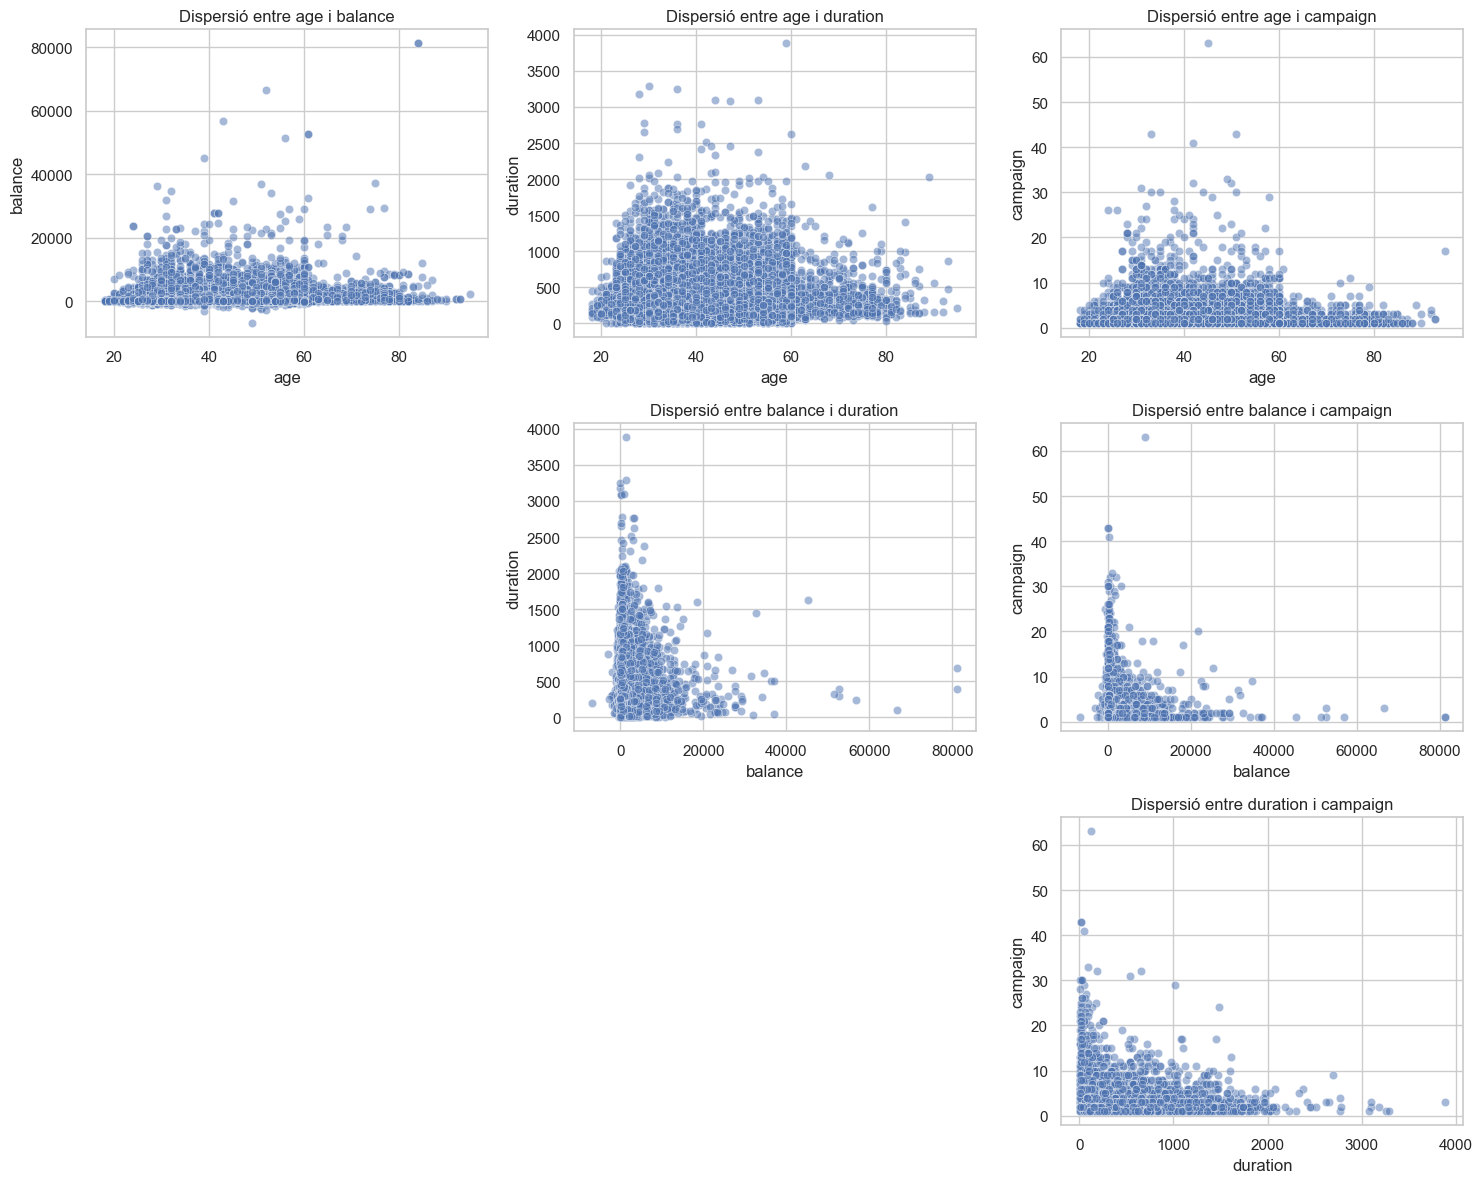

In [107]:
numeric_cols2 = ['age', 'balance', 'duration', 'campaign']

# Crear una figura per als gràfics
plt.figure(figsize=(15, 12))

# Crear gràfics de dispersió entre cada parell de variables numèriques
for i in range(len(numeric_cols2)):
    for j in range(i + 1, len(numeric_cols2)):
        plt.subplot(len(numeric_cols2)-1, len(numeric_cols2)-1, (i * (len(numeric_cols2)-1)) + j)
        sns.scatterplot(x=banc[numeric_cols2[i]], y=banc[numeric_cols2[j]], alpha=0.5)
        plt.title(f'Dispersió entre {numeric_cols2[i]} i {numeric_cols2[j]}')
        plt.xlabel(numeric_cols2[i])
        plt.ylabel(numeric_cols2[j])

plt.tight_layout()  # Ajustar l'espai entre gràfics
plt.show()

creo que la decisión de pasar a categorica ultimo contacto no ha sido demasiado acertada

<Figure size 1000x600 with 0 Axes>

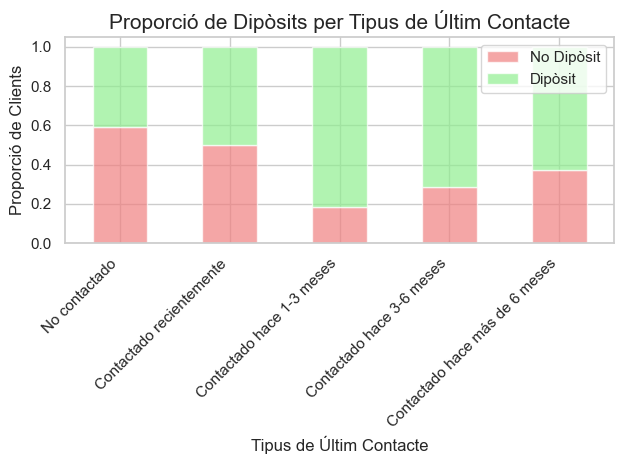

In [108]:
contact_deposit_counts = banc.groupby(['ultimo contacto', 'deposit_numeric']).size().unstack()

# Calcular les proporcions per cada tipus de contacte
contact_deposit_proportions = contact_deposit_counts.div(contact_deposit_counts.sum(axis=1), axis=0)

# Configurar el tamany de la figura
plt.figure(figsize=(10, 6))

# Crear el gràfic de barres apilat
contact_deposit_proportions.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], alpha=0.7)

# Configurar el títol i etiquetes
plt.title('Proporció de Dipòsits per Tipus de Últim Contacte', fontsize=15)
plt.xlabel('Tipus de Últim Contacte', fontsize=12)
plt.ylabel('Proporció de Clients', fontsize=12)

# Rotar les etiquetes del darrer contacte per evitar que es solapin
plt.xticks(rotation=45, ha='right')

# Llegenda
plt.legend(['No Dipòsit', 'Dipòsit'], loc='upper right')

# Mostrar el gràfic
plt.tight_layout()
plt.show()


Podemos observar que un contacto ejecutado de uno a 3 meses antes de suscribir el deposito, tiene mucho más exito que los demás.

In [109]:
banc_def= banc.copy()

TRANSFORMACIONS:  
plantejament de les transformacions: 

Mantenir deposit en el seu estat original, doncs és el target.  
Aplicar get_dummies a les variables categòriques a excepció de dipòsit.   
Aplicar RobustScaler a las variables numèriques, doncs totes tenen outliers.   
Aplicar OrdinalEncoder a day y month. 
Convertir les variables booleanas amb hot encoder.
 

dataset nou amb:  
target: deposit  
numèriques: age, balance, duration, campaign, pdays  
categòriques:  job, marital, education, day , month
bool: default_numeric, housing_numeric, loan_numeric, contact_previ_numeric

In [110]:
banc_def = banc.copy()

# Reemplazar los valores -1 en pdays por 0
banc_def['pdays'] = banc_def['pdays'].replace(-1, 0)

# Definir las columnas que queremos incluir en banc_def
target = 'deposit'
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays']
categorical_columns = ['job', 'marital', 'education', 'day', 'month']
boolean_columns = ['default_numeric', 'housing_numeric', 'loan_numeric', 'contact_previ_numeric']

# Combinar todas las columnas en una lista
selected_columns = [target] + numerical_columns + categorical_columns + boolean_columns

# Filtrar el DataFrame
banc_def = banc_def[selected_columns]
banc_def.head()

,deposit,age,balance,duration,campaign,pdays,job,marital,education,day,month,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric
0,yes,59,2343,1042,1,0,admin.,married,secondary,5,may,0,1,0,0
1,yes,56,45,1467,1,0,admin.,married,secondary,5,may,0,0,0,0
2,yes,41,1270,1389,1,0,technician,married,secondary,5,may,0,1,0,0
3,yes,55,2476,579,1,0,services,married,secondary,5,may,0,1,0,0
4,yes,54,184,673,2,0,admin.,married,tertiary,5,may,0,0,0,0


In [111]:
banc_def.to_csv('banc_def.csv', index=False)

In [114]:
from sklearn.preprocessing import RobustScaler
import pickle

banc_transformed = banc_def.copy()

# Aplicar RobustScaler a las columnas numéricas
scaler = RobustScaler()
banc_transformed[numerical_columns] = scaler.fit_transform(banc_transformed[numerical_columns])

# Guardar l'escalador
with open("robust_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Aplicar get_dummies a las columnas categóricas
banc_transformed = pd.get_dummies(banc_transformed, columns=categorical_columns, drop_first=False)

# Las columnas booleanas ya están en formato 0/1, por lo tanto, no necesitan transformaciones adicionales
banc_transformed.head()


,deposit,age,balance,duration,campaign,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,yes,1.176471,1.130517,2.198324,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
1,yes,1.000000,-0.318411,3.385475,-0.5,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,yes,0.117647,0.453972,3.167598,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
3,yes,0.941176,1.214376,0.905028,-0.5,0.0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
4,yes,0.882353,-0.230769,1.167598,0.0,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


In [115]:
banc_transformed.columns

Index(['deposit', 'age', 'balance', 'duration', 'campaign', 'pdays',
       'default_numeric', 'housing_numeric', 'loan_numeric',
       'contact_previ_numeric', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month

In [116]:
pd.set_option('display.max_rows', None)
banc_transformed.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
deposit,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
age,1.176471,1.0,0.117647,0.941176,0.882353,0.176471,1.0,1.235294,-0.117647,-0.647059,-0.058824,-0.529412
balance,1.130517,-0.318411,0.453972,1.214376,-0.230769,-0.346784,0.176545,-0.003153,-0.346154,2.862547,-0.283733,-0.151955
duration,2.198324,3.385475,3.167598,0.905028,1.167598,0.857542,2.642458,2.164804,0.986034,2.910615,1.48324,3.684358
campaign,-0.5,-0.5,-0.5,-0.5,0.0,0.0,-0.5,-0.5,-0.5,0.5,-0.5,0.0
pdays,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
default_numeric,0,0,0,0,0,0,0,0,0,0,0,0
housing_numeric,1,0,1,1,0,1,1,1,1,1,1,1
loan_numeric,0,0,0,0,0,1,1,0,0,0,0,0
contact_previ_numeric,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
banc_transformed.to_csv('banc_transformed.csv', index=False)